# KNN分类模型转回归模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#样本特征
data_X=[
    [1.3,6],
    [3.5,5],
    [4.2,2],
    [5,3.3],
    [2,9],
    [5,7.5],
    [7.2,4],
    [8.1,8],
    [9,2.5]
]

In [3]:
data_y=[0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7]

In [4]:
#训练集
X_train=np.array(data_X)
y_train=np.array(data_y)

In [5]:
#新样本点
data_new=np.array([4,5])

## [plt.annotate用法](https://blog.csdn.net/qq_43212169/article/details/102649133)

IndexError: index 9 is out of bounds for axis 0 with size 9

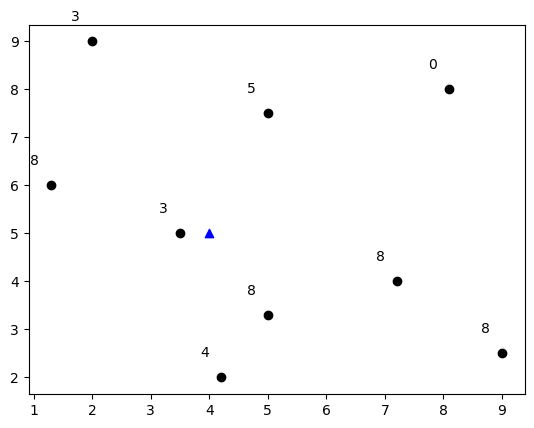

In [38]:
plt.scatter(X_train[:,0],X_train[:,1],color='black',marker='o')
plt.scatter(data_new[0],data_new[1],color='blue',marker='^')
for i in range(len(y_train)):
    plt.annotate(y_train[i],xy=X_train[i],xytext=(-15,15),textcoords='offset points')
plt.show()

In [7]:
distance=[np.sqrt(np.sum((data-data_new)**2)) for data in X_train]#注意掌握

In [8]:
sort_index=np.argsort(distance)

In [9]:
k=5
first_k=[y_train[i]for i in sort_index[:k]]

In [10]:
from collections import Counter
Counter(first_k)#计数

Counter({0.3: 1, 0.7: 1, 1.1: 1, 0.1: 1, 0.5: 1})

In [11]:
#predict_y=Counter(first_k).most_common(1)[0][0]
#predict_y

In [12]:
k=5
first_k=[y_train[i]for i in sort_index[:k]]
np.mean(first_k)

0.54

# KNN回归Scikit learn实现

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knn_reg=KNeighborsRegressor(n_neighbors=5)

In [15]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [16]:
predict_y=knn_reg.predict(data_new.reshape(1,-1))
predict_y

array([0.54])

# digits数据集

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [18]:
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
digits=load_digits()
x=digits.data
y=digits.target
print(data)
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=233)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn_reg=KNeighborsRegressor(n_neighbors=5,weights='distance',p=2)

In [22]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(weights='distance')

In [23]:
knn_reg.score(x_test,y_test)

0.9654148504367795

## 不要忘记归一化

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
standarscaler=StandardScaler()

In [26]:
standarscaler.fit(x_train)

StandardScaler()

In [27]:
x_train=standarscaler.transform(x_train)

In [28]:
x_test=standarscaler.transform(x_test)

In [29]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(weights='distance')

In [30]:
knn_reg.score(x_test,y_test)

0.9393053733267964